# Dataset information
This dataset covers customer infomation for a Grocery retail company. This data shares information about over 2000 customers that made purchases during years 2014-2015, and describes them by demographical indicators (age, marital status etc) and spending habits, including mode of making purchases and spending categories distribution.

# Data preprocessing

In [26]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#Reading the dataset and looking up how it looks. 
data = pd.read_csv('marketing_campaign.csv', delimiter='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [27]:
#Checking number of sales before removing any instances for data analysis 
print("\nShape of the datasets is:", data.shape)

#No duplicates! Splendid
duplicates = data.duplicated()
print("Number of duplicate rows:", duplicates.sum())

missing_counts = data.isnull().sum()
print(missing_counts)

# Several columns have few missing data, so we can just drop those instances instead, as they will not affect the analysis much
columns_to_check = ['Income']
data = data.dropna(subset=columns_to_check)


Shape of the datasets is: (2240, 29)
Number of duplicate rows: 0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [28]:
data['Children'] = data['Kidhome'] + data['Teenhome']
data['Parental_Status'] = data['Children'].apply(lambda x: 1 if x != 0 else 0)

data['Age'] = 2014 - data['Year_Birth'] 

In [29]:
# Calculate the frequency of each unique value
value_counts = data['Education'].value_counts()
total_entries = len(data)
percentage_values = (value_counts / total_entries) * 100
print('Here are frequency counts for values in Education column')
print(percentage_values)
data['Education'] = data['Education'].replace({"Basic": 0, "Graduation": 1, "2n Cycle": 2, "Master": 2, "PhD": 3})

#
value_counts = data['Marital_Status'].value_counts()
percentage_values = (value_counts / total_entries) * 100

print('\nHere are frequency counts for values in Marital Status column')
print(percentage_values)
data['Marital_Status'] = data['Marital_Status'].replace({'Married': 'Partner', 'Together': 'Partner', 'Single': 'Single', 'Divorced': 'Single', 'Widow': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'})
data = pd.concat([data, pd.get_dummies(data['Marital_Status'])], axis=1)  

Here are frequency counts for values in Education column
Graduation    50.361011
PhD           21.705776
Master        16.471119
2n Cycle       9.025271
Basic          2.436823
Name: Education, dtype: float64

Here are frequency counts for values in Marital Status column
Married     38.673285
Together    25.857401
Single      21.254513
Divorced    10.469314
Widow        3.429603
Alone        0.135379
Absurd       0.090253
YOLO         0.090253
Name: Marital_Status, dtype: float64


In [30]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format='%d-%m-%Y')

In [31]:
# Customer's total spent on products
data['Total_Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

# Narrowing down to 1 category with all offers.
data["Total_Offer"] =  data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]

# Narrowing down to these columns to 1 total category
data['Num_Total_Purchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']


In [32]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Children,Parental_Status,Age,Alone,Partner,Single,Total_Spent,Total_Offer,Num_Total_Purchases
0,5524,1957,1,Single,58138.0,0,0,2012-09-04,58,635,...,1,0,0,57,0,0,1,1617,0,25
1,2174,1954,1,Single,46344.0,1,1,2014-03-08,38,11,...,0,2,1,60,0,0,1,27,0,6
2,4141,1965,1,Partner,71613.0,0,0,2013-08-21,26,426,...,0,0,0,49,0,1,0,776,0,21
3,6182,1984,1,Partner,26646.0,1,0,2014-02-10,26,11,...,0,1,1,30,0,1,0,53,0,8
4,5324,1981,3,Partner,58293.0,1,0,2014-01-19,94,173,...,0,1,1,33,0,1,0,422,0,19


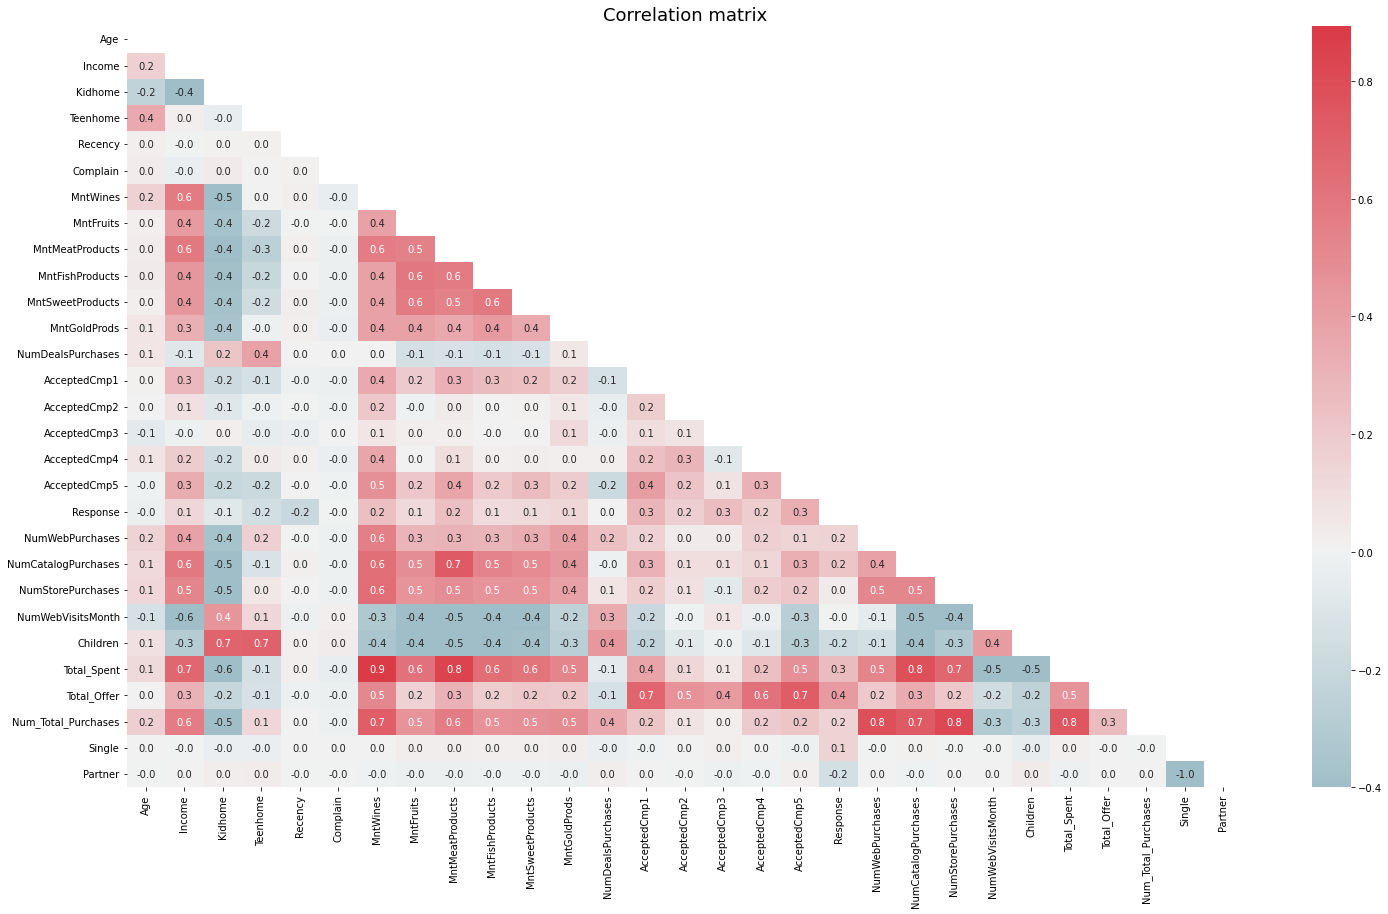

In [33]:
to_corr = ['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain', 
          'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
          'MntGoldProds', 'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
          'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'NumWebPurchases', 'NumCatalogPurchases', 
          'NumStorePurchases', 'NumWebVisitsMonth', 'Children',
           'Total_Spent', "Total_Offer", 'Num_Total_Purchases', 'Single', 'Partner']

cmap = sns.diverging_palette(220, 10, as_cmap=True)
matrix = np.triu(data[to_corr].corr())
plt.figure(figsize=(25, 14))
plt.title('Correlation matrix', fontsize=18)
sns.heatmap(data[to_corr].corr(), annot=True,
            fmt='.1f', vmin=-0.4, center=0, cmap=cmap, mask=matrix)

plt.show()

In [34]:
#cols_to_be_deleted = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", 
#                      "MntGoldProds","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases",
#                      "NumDealsPurchases","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", 
#                      "Response","Year_Birth", "Complain",'Z_CostContact', 'Z_Revenue',"Dt_Customer"]
#data = data.drop(['Kidhome', 'Teenhome'], axis=1)
#
#data = data.drop(columns=cols_to_be_deleted, axis=1)

In [35]:
def remove_outliers(data: pd.DataFrame, column: str) -> pd.Series:
    q3, q1 = np.nanpercentile(data[column], [75, 25])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]

    return data

data = remove_outliers(data, 'Age')
data = remove_outliers(data, 'Income')

In [36]:
data.drop(['Year_Birth', 'ID', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer', 'Marital_Status'], axis=1, inplace=True)

#cols_to_be_deleted = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", 
#                      "MntGoldProds","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases",
#                      "NumDealsPurchases","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", 
#                      "Response","Year_Birth", "Complain",'Z_CostContact', 'Z_Revenue',"Dt_Customer"]
#data = data.drop(['Kidhome', 'Teenhome'], axis=1)
#
#data = data.drop(columns=cols_to_be_deleted, axis=1)


# Data scaling

In [37]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Response,Children,Parental_Status,Age,Alone,Partner,Single,Total_Spent,Total_Offer,Num_Total_Purchases
0,1,58138.0,0,0,58,635,88,546,172,88,...,1,0,0,57,0,0,1,1617,0,25
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,2,1,60,0,0,1,27,0,6
2,1,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,49,0,1,0,776,0,21
3,1,26646.0,1,0,26,11,4,20,10,3,...,0,1,1,30,0,1,0,53,0,8
4,3,58293.0,1,0,94,173,43,118,46,27,...,0,1,1,33,0,1,0,422,0,19


In [39]:
scaler = MinMaxScaler()
data_transformed = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Dimensionality reduction

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)  # Specify the number of components you want to keep
data_transformed = pd.DataFrame(pca.fit_transform(data_transformed), columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7', 'PC8'])

In [43]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, pairwise_distances
dis_values = []
sil_score = []
# Perform clustering for 2 to 8 clusters
for n_clusters in range(2, 9):
    # Initialize the KMeans model with the desired number of clusters
    kmeans = KMeans(n_clusters=n_clusters)
    
    # Fit the model to your data
    kmeans.fit(data_transformed)
    
    # Get the cluster labels for each data point
    labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(data_transformed, labels)
    sil_score.append(silhouette_avg)
    
    # Compute distortion value (inertia)
    distortion = kmeans.inertia_
    dis_values.append(distortion)

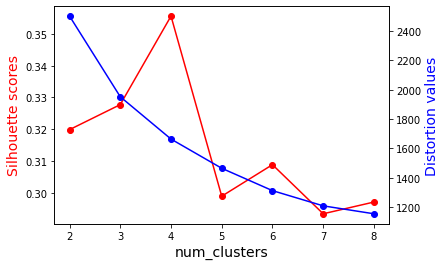

In [15]:
# create figure and axis objects with subplots()
num_clusters = range(2,9)
fig,ax = plt.subplots()
# make a plot
ax.plot(num_clusters,
        sil_score,
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("num_clusters", fontsize = 14)
# set y-axis label
ax.set_ylabel("Silhouette scores",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(num_clusters, dis_values,color="blue",marker="o")
ax2.set_ylabel("Distortion values",color="blue",fontsize=14)
plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [16]:
kmeans = KMeans(n_clusters=4)
    
    # Fit the model to your data
kmeans.fit(data_transformed)
    
    # Get the cluster labels for each data point
labels = kmeans.labels_

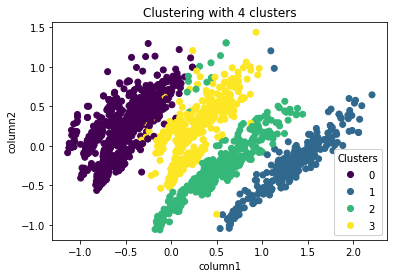

In [17]:
# Visualize the clustering results using scatter plots
fig, ax = plt.subplots()
scatter = ax.scatter(data_transformed['PC1'], data_transformed['PC3'], c=labels)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.title("Clustering with 4 clusters")
plt.xlabel('column1')
plt.ylabel('column2')
plt.show()                                                                                                      

In [18]:
labels

df = pd.DataFrame(labels, columns = ['Labels'])
print(df)
print(data.shape)

      Labels
0          1
1          3
2          2
3          0
4          0
...      ...
2200       0
2201       0
2202       1
2203       0
2204       0

[2205 rows x 1 columns]
(2205, 32)


In [19]:
best_model = KMeans(n_clusters=3)
labels = pd.DataFrame(best_model.fit_predict(data_transformed), columns=['Clusters'], index=df.index)
data = pd.concat([data, df], axis=1)

In [20]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Children,Parental_Status,Age,Alone,Partner,Single,Total_Spent,Total_Offer,Num_Total_Purchases,Labels
0,1.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,...,0.0,0.0,57.0,0.0,0.0,1.0,1617.0,0.0,25.0,1.0
1,1.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,...,2.0,1.0,60.0,0.0,0.0,1.0,27.0,0.0,6.0,3.0
2,1.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,...,0.0,0.0,49.0,0.0,1.0,0.0,776.0,0.0,21.0,2.0
3,1.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,...,1.0,1.0,30.0,0.0,1.0,0.0,53.0,0.0,8.0,0.0
4,3.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,...,1.0,1.0,33.0,0.0,1.0,0.0,422.0,0.0,19.0,0.0


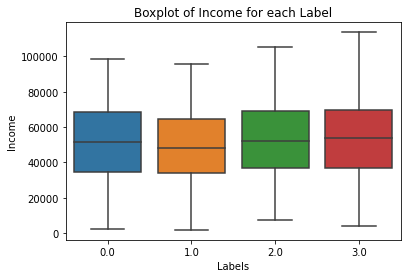

In [21]:
# Assuming your dataframe is called 'df'
sns.boxplot(x='Labels', y='Income', data=data)
plt.xlabel('Labels')
plt.ylabel('Income')
plt.title('Boxplot of Income for each Label')
plt.show()

In [22]:
average_values = data.groupby('Labels')['Income'].mean()

In [23]:
average_values

Labels
0.0    51312.716797
1.0    48788.445783
2.0    52969.118110
3.0    52974.888031
Name: Income, dtype: float64

In [24]:
average_values = data.groupby('Labels')['Age'].mean()
average_values

Labels
0.0    45.007812
1.0    45.008032
2.0    45.328084
3.0    45.200772
Name: Age, dtype: float64